   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0           1   56               76228                      97
1           2   69               63984                       1
2           3   46               55774                      19
3           4   32               17568                       2
4           5   60               77592                      53
[[ 0.85300339  0.7576425   1.5154897 ]
 [ 1.72960766  0.25644931 -1.64589689]
 [ 0.17869241 -0.07961702 -1.05313691]
 [-0.76534296 -1.64353298 -1.61296578]
 [ 1.12272778  0.81347617  0.06652084]]


C:\Users\KPRIET\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KPRIET\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KPRIET\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KPRIET\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

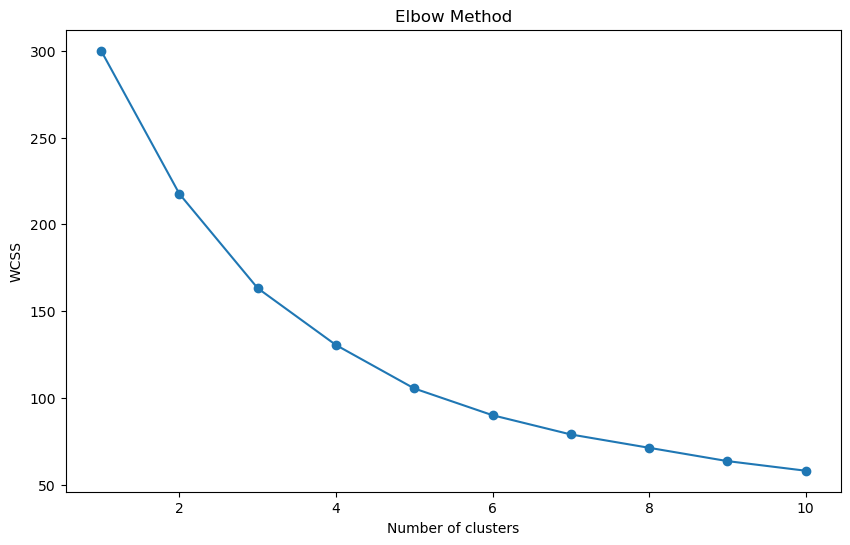

C:\Users\KPRIET\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1   56               76228                      97        4
1           2   69               63984                       1        3
2           3   46               55774                      19        2
3           4   32               17568                       2        2
4           5   60               77592                      53        3


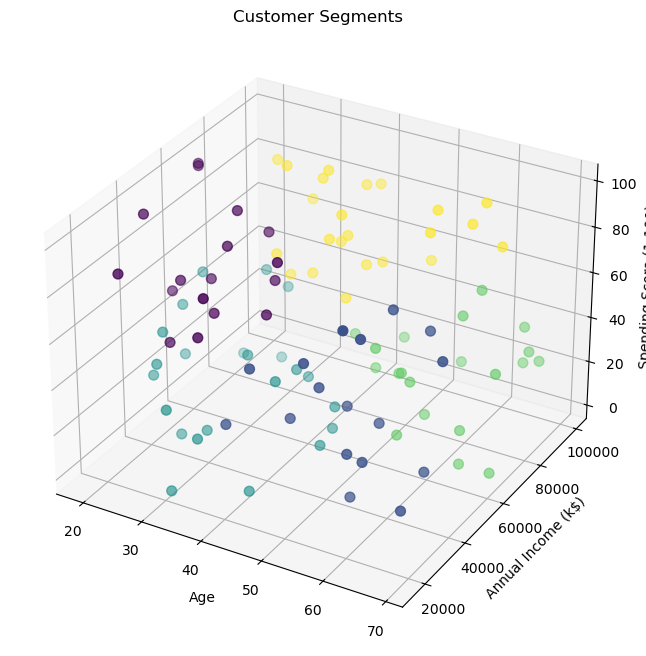

In [1]:
# Customer Segmentation using K-Means clustering algorithm_Palanichamy Naveen

# 1. Setting up the Environment

# pip install pandas numpy matplotlib seaborn scikit-learn

# Loading the Dataset

# 3. Generating a Synthetic Dataset

import pandas as pd
import numpy as np

# Generate synthetic dataset
np.random.seed(42)
customer_ids = np.arange(1, 101)
ages = np.random.randint(18, 70, size=100)
annual_incomes = np.random.randint(15000, 100000, size=100)
spending_scores = np.random.randint(1, 101, size=100)

# Create a DataFrame
data = pd.DataFrame({
    'CustomerID': customer_ids,
    'Age': ages,
    'Annual Income (k$)': annual_incomes,
    'Spending Score (1-100)': spending_scores
})

print(data.head())


# 4. Preprocessing the Data

from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print(scaled_features[:5])

# 4. Applying K-Means Clustering

from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means with the optimal number of clusters (e.g., 5)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

print(data.head())

# 5. Visualizing the Clusters

from mpl_toolkits.mplot3d import Axes3D

# 3D plot of the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], s=50, cmap='viridis')
ax.set_title('Customer Segments')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()
